# Figure out how to express epsilon for a two bump core-skin profile

# Look at Sander's approach

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

In [2]:
from scipy.interpolate import PiecewisePolynomial

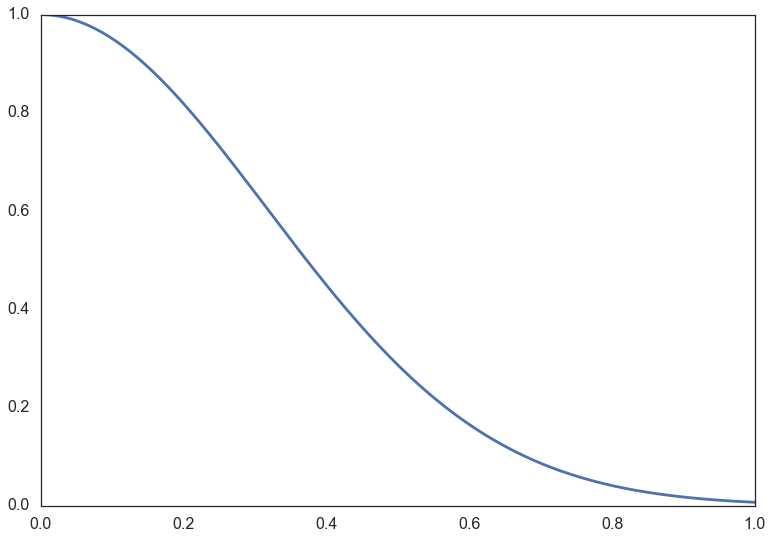

In [3]:
r = np.linspace(0, 1, 200)
j_z = np.exp(-5*r**2)
plt.plot(r, j_z)

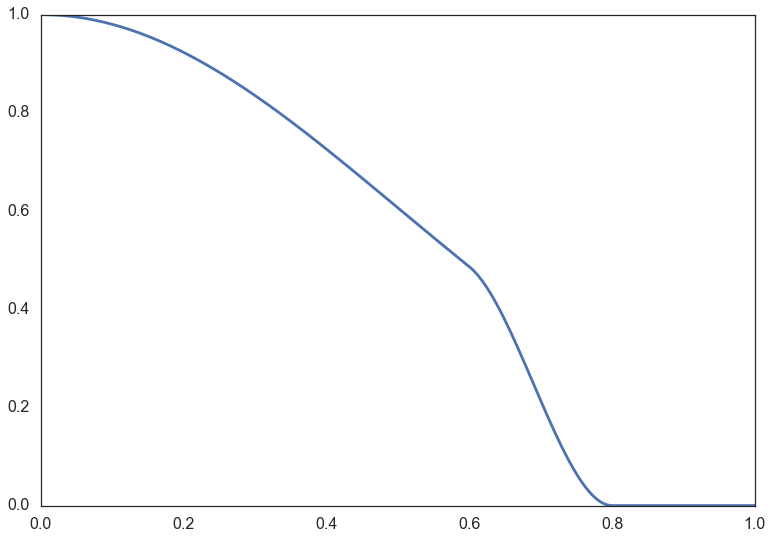

In [4]:
r = np.linspace(0, 1, 200)
core = np.exp(-2*r**2)
skin_peak = 0
skin = PiecewisePolynomial([0.6, 0.8, 1.0], [[np.exp(-2*0.6**2), -4*0.6*np.exp(-2*0.6**2)], [skin_peak, 0.], [0.,0.]])
j_z = core
indexes = np.where(r >= 0.6)
j_z[indexes] = skin(r[indexes])
plt.plot(r, j_z)

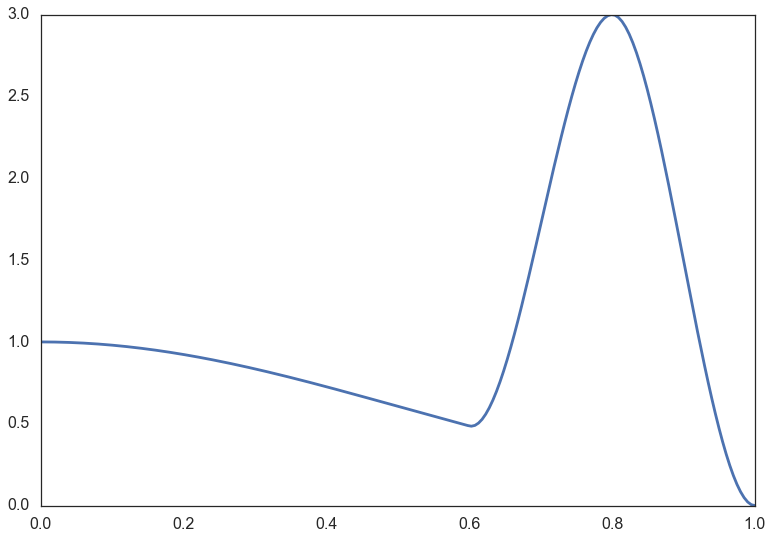

In [5]:
r = np.linspace(0, 1, 200)
core = np.exp(-2*r**2)
skin_peak = 3
skin = PiecewisePolynomial([0.6, 0.8, 1.0], [[np.exp(-2*0.6**2), -4*0.6*np.exp(-2*0.6**2)], [skin_peak, 0.], [0.,0.]]                                                                               )
j_z = core
indexes = np.where(r >= 0.6)
j_z[indexes] = skin(r[indexes])
plt.plot(r, j_z)

In [8]:
def skin_current_integrand(r, skin_peak):
    skin = PiecewisePolynomial([0.6, 0.8, 1.0], [[np.exp(-2*0.6**2), -4*0.6*np.exp(-2*0.6**2)], [skin_peak, 0.], [0.,0.]])
    return skin(r)*r

In [9]:
from scipy.integrate import quad

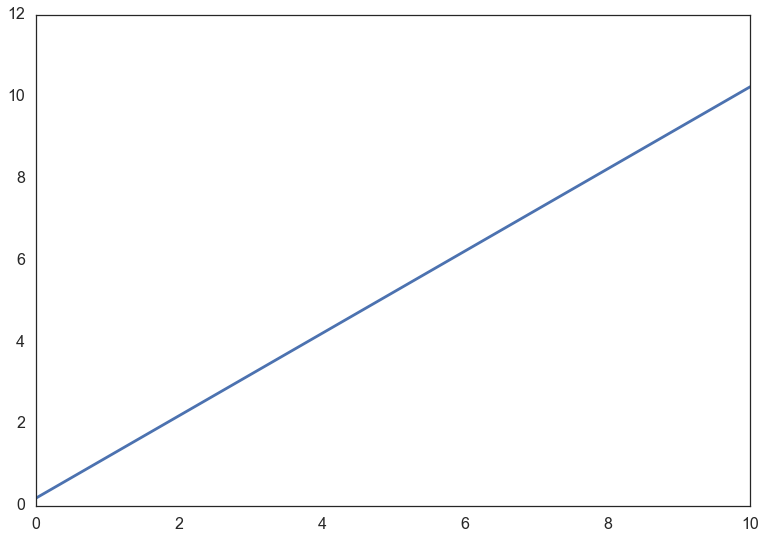

In [10]:
skin_peaks = np.linspace(0, 10, 200)
integrals = []
for skin_peak in skin_peaks:
    def skin_current_integrand(r):
        skin = PiecewisePolynomial([0.6, 0.8, 1.0], [[np.exp(-2*0.6**2), -4*0.6*np.exp(-2*0.6**2)], [skin_peak, 0.], [0.,0.]])
        return skin(r)*r
    integrals.append(quad(skin_current_integrand, 0.6, 1.)[0]*2*np.pi)
    
plt.plot(skin_peaks, integrals)

In [11]:
from scipy.stats import linregress
linregress(skin_peaks, integrals)

LinregressResult(slope=1.0053096491487337, intercept=0.18521395596186707, rvalue=1.0, pvalue=0.0, stderr=0.0)

In [12]:
def skin_current(skin_peak):
    return (1.0053096491487337 * skin_peak + 0.18521395596186707)

In [13]:
def core_integrand(r):
    return np.exp(-2*r**2)*r

In [14]:
core_current = quad(core_integrand, 0, 0.6)[0]*2*np.pi

In [15]:
print core_current

0.806207671074


In [16]:
def epsilon(skin_peak):
    return core_current / (core_current + skin_current(skin_peak))

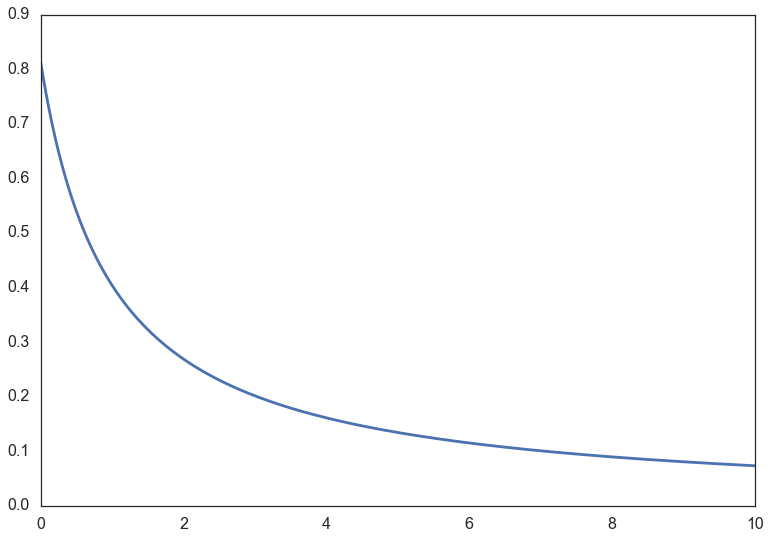

In [17]:
skin_peaks = np.linspace(0, 10, 200)
plt.plot(skin_peaks, epsilon(skin_peaks))

In [18]:
def peak(epsilon, i_core=0.806207671074, slope=1.0053096491487337, offset=0.18521395596186707):
    return (i_core/epsilon - i_core - offset) / slope